<a href="https://colab.research.google.com/github/kaushikpatriot/ML-Work/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loading and basic cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
def warn(*args, **kwargs):
  pass

warnings.warn = warn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/MLP-Code/Project/train_data.csv'
train_df = pd.read_csv(train_path)
test_path = '/content/drive/MyDrive/Colab Notebooks/MLP-Code/Project/test_data.csv'
test_df = pd.read_csv(test_path)

In [ ]:
train_df.shape, test_df.shape

((12379, 31), (5305, 30))

In [ ]:
train_df.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food,Offer Accepted
0,2days,₹100000 or More,4~8,1,less1,Married partner,4 star restaurant,36,0,0,...,0,0,4,67,less1,22,Spring,Location B,0,No
1,2days,₹87500 - ₹99999,4~8,0,4~8,Married partner,Take-away restaurant,50plus,0,0,...,0,1,3,89,1~3,18,Summer,Location B,0,Yes
2,2days,₹87500 - ₹99999,less1,1,1~3,Single,Cold drinks,26,1,0,...,1,1,4,67,less1,7,Winter,Location A,1,Yes
3,10hours,₹37500 - ₹49999,less1,0,1~3,Single,Take-away restaurant,46,1,0,...,0,1,3,89,1~3,7,Summer,Location C,0,No
4,2days,₹100000 or More,never,1,1~3,Single,4 star restaurant,21,0,1,...,1,0,3,40,less1,7,Summer,Location C,0,No


In [ ]:
test_df.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,Job/Job Industry,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food
0,2days,₹37500 - ₹49999,1~3,1,1~3,Divorced,Take-away restaurant,50plus,0,1,...,Sales & Related,1,1,4,89,less1,7,Summer,Location C,0
1,10hours,₹25000 - ₹37499,4~8,0,1~3,Unmarried partner,Cold drinks,21,1,0,...,Computer & Mathematical,1,1,0,67,less1,18,Summer,Location A,1
2,2days,₹100000 or More,never,1,never,Single,Cold drinks,21,1,0,...,Unemployed,1,0,4,67,never,7,Summer,Location C,0
3,2days,₹25000 - ₹37499,never,1,1~3,Married partner,Restaurant with pub,41,0,0,...,Unemployed,1,1,0,40,less1,18,Spring,Location C,1
4,10hours,₹12500 - ₹24999,never,0,1~3,Single,2 star restaurant,31,1,0,...,Unemployed,0,0,0,89,1~3,18,Summer,Location B,1


##Removing unnecessary columns

The column 'Car' has too many missing elements to reliably impute. Hence removed from the dataset.

In [ ]:
train_nored = train_df.drop(['car','travelled_more_than_5mins_for_offer'], axis = 1)
test_nored = test_df.drop(['car','travelled_more_than_5mins_for_offer'], axis = 1)

In [ ]:
train_nored.shape, test_nored.shape

((12379, 29), (5305, 28))

#Ordinal Encoding and Imputation

In [ ]:
#Dictionary for encoding
custom_encoding_dict = {'offer expiration': {'2days':48, '10hours':10},
                 'income_range': {'₹100000 or More': 100000, '₹87500 - ₹99999': 87500, '₹37500 - ₹49999': 37500, 'Less than ₹12500': 5000, '₹50000 - ₹62499': 50000,
                                  '₹12500 - ₹24999': 12500, '₹75000 - ₹87499': 75000, '₹25000 - ₹37499': 25000, '₹62500 - ₹74999': 62500},
                 'no_visited_Cold drinks': {'4~8':3,'less1':1, 'never':0, '1~3':2, 'gt8': 4},
                 'Restaur_spend_less_than20': {'less1':1, '4~8':3, '1~3':2, 'gt8':4, 'never': 0},
                 'age': {'36':36, '50plus':50, '26':26, '46':46, '21':21, 'below21':18, '41':41, '31':31},
                 'no_visited_bars': {'less1':1, 'never':0, '1~3':2, '4~8':3, 'gt8':4},
                 'Qualification': {'Bachelors degree': 3,  'Some college - no degree': 2, 'Graduate degree (Masters or Doctorate)': 5, 'Associates degree': 4,
                                   'High School Graduate': 1, 'Some High School': 0 },
                 'no_Take-aways': {'less1':1, 'never':0, '1~3':2, '4~8':3, 'gt8':4},
                 'Restaur_spend_greater_than20': {'less1':1, 'never':0, '1~3':2, '4~8':3, 'gt8':4},
                 }

one_hot_encoding_list = ['Marital Status', 'gender' , 'Customer type', 'Job/Job Industry', 'Climate' ,'drop location','restaurant type']
no_encoding_list = ['travelled_more_than_15mins_for_offer', 'Prefer western over chinese','travelled_more_than_25mins_for_offer', 'restuarant_same_direction_house',
                    'Cooks regularly', 'is foodie','restuarant_opposite_direction_house', 'has Children','visit restaurant with rating (avg)', 'temperature', 'Travel Time', 'Prefer home food' ]

In [ ]:
print(len(custom_encoding_dict) + len(one_hot_encoding_list) + len(no_encoding_list))

28


In [ ]:
train_enc = train_nored.copy()
test_enc = test_nored.copy()

In [ ]:
for feature in custom_encoding_dict.keys():
  train_enc[feature] = train_nored[feature].map(custom_encoding_dict[feature])
  test_enc[feature] = test_nored[feature].map(custom_encoding_dict[feature])

train_enc.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food,Offer Accepted
0,48,100000,3.0,1,1.0,Married partner,4 star restaurant,36,0,0,...,0,0,4,67,1.0,22,Spring,Location B,0,No
1,48,87500,3.0,0,3.0,Married partner,Take-away restaurant,50,0,0,...,0,1,3,89,2.0,18,Summer,Location B,0,Yes
2,48,87500,1.0,1,2.0,Single,Cold drinks,26,1,0,...,1,1,4,67,1.0,7,Winter,Location A,1,Yes
3,10,37500,1.0,0,2.0,Single,Take-away restaurant,46,1,0,...,0,1,3,89,2.0,7,Summer,Location C,0,No
4,48,100000,0.0,1,2.0,Single,4 star restaurant,21,0,1,...,1,0,3,40,1.0,7,Summer,Location C,0,No


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
le = LabelEncoder()
for feature in one_hot_encoding_list:
  train_enc[feature] = le.fit_transform(train_enc.loc[:, feature])
  test_enc[feature] = le.transform(test_enc.loc[:, feature])

train_enc['Offer Accepted'] = le.fit_transform(train_enc.loc[:, 'Offer Accepted'])
train_enc.head()


,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food,Offer Accepted
0,48,100000,3.0,1,1.0,1,1,36,0,0,...,0,0,4,67,1.0,22,0,1,0,0
1,48,87500,3.0,0,3.0,1,4,50,0,0,...,0,1,3,89,2.0,18,1,1,0,1
2,48,87500,1.0,1,2.0,2,2,26,1,0,...,1,1,4,67,1.0,7,2,0,1,1
3,10,37500,1.0,0,2.0,2,4,46,1,0,...,0,1,3,89,2.0,7,1,2,0,0
4,48,100000,0.0,1,2.0,2,1,21,0,1,...,1,0,3,40,1.0,7,1,2,0,0


In [ ]:
test_enc.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,Job/Job Industry,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food
0,48,37500,2.0,1,2.0,0,4,50,0,1,...,21,1,1,4,89,1.0,7,1,2,0
1,10,25000,3.0,0,2.0,3,2,21,1,0,...,5,1,1,0,67,1.0,18,1,0,1
2,48,100000,0.0,1,0.0,2,2,21,1,0,...,24,1,0,4,67,0.0,7,1,2,0
3,48,25000,0.0,1,2.0,1,3,41,0,0,...,24,1,1,0,40,1.0,18,0,2,1
4,10,12500,0.0,0,2.0,2,0,31,1,0,...,24,0,0,0,89,2.0,18,1,1,1


In [ ]:
train_enc.isna().sum()

offer expiration                          0
income_range                              0
no_visited_Cold drinks                  198
travelled_more_than_15mins_for_offer      0
Restaur_spend_less_than20               121
Marital Status                            0
restaurant type                           0
age                                       0
Prefer western over chinese               0
travelled_more_than_25mins_for_offer      0
no_visited_bars                          93
gender                                    0
restuarant_same_direction_house           0
Cooks regularly                           0
Customer type                             0
Qualification                             0
is foodie                                 0
no_Take-aways                           144
Job/Job Industry                          0
restuarant_opposite_direction_house       0
has Children                              0
visit restaurant with rating (avg)        0
temperature                     

In [ ]:
train_X = train_enc.iloc[:, :-1]
train_y = train_enc.iloc[:, -1]

In [ ]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors = 5)
train_knn = knn.fit_transform(train_X)
train_knn = pd.DataFrame(train_knn, columns = train_X.columns)
test_knn = knn.transform(test_enc)
test_knn = pd.DataFrame(test_knn, columns = test_enc.columns)


In [ ]:
missing_cols = ['no_visited_Cold drinks', 'Restaur_spend_less_than20', 'no_visited_bars', 'no_Take-aways', 'Restaur_spend_greater_than20']
for i in missing_cols:
  train_knn[i] = train_knn[i].round(0)
  test_knn[i] = test_knn[i].round(0)


In [ ]:
for i in missing_cols:
  print(train_knn[i].value_counts())
  print('----------------------------')

1.0    3383
2.0    3233
0.0    2920
3.0    1790
4.0    1053
Name: no_visited_Cold drinks, dtype: int64
----------------------------
2.0    5320
3.0    3525
1.0    2061
4.0    1265
0.0     208
Name: Restaur_spend_less_than20, dtype: int64
----------------------------
0.0    5084
1.0    3462
2.0    2436
3.0    1048
4.0     349
Name: no_visited_bars, dtype: int64
----------------------------
2.0    4748
3.0    4153
1.0    1767
4.0    1571
0.0     140
Name: no_Take-aways, dtype: int64
----------------------------
1.0    6102
2.0    3252
0.0    2046
3.0     712
4.0     267
Name: Restaur_spend_greater_than20, dtype: int64
----------------------------


#Data Balancing (using imblearn)

In [ ]:
#Without Balancing
train_imb_X = train_knn
train_imb_y = train_y

In [ ]:
# With Balancing
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 43)

In [ ]:
train_imb_X, train_imb_y = sm.fit_resample(train_knn, train_y)

In [ ]:
print(train_y.value_counts())
print(train_imb_y.value_counts())

1    6994
0    5385
Name: Offer Accepted, dtype: int64
0    5385
1    5385
Name: Offer Accepted, dtype: int64


In [ ]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=43)

In [ ]:
train_imb_X, train_imb_y = cc.fit_resample(train_knn, train_y)

#Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, RFE, SequentialFeatureSelector, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [ ]:
# No Feature selection
train_feat = train_imb_X
test_feat = test_knn
feature_list = one_hot_encoding_list

In [ ]:
#Select K-Best
skb = SelectKBest(chi2, k = 10)
train_feat = skb.fit_transform(X = train_imb_X,y=train_imb_y)
train_feat = pd.DataFrame(train_feat, columns = skb.get_feature_names_out())
test_feat = skb.transform(X=test_knn)
test_feat = pd.DataFrame(test_feat, columns = skb.get_feature_names_out())
feature_list = skb.get_feature_names_out()

In [ ]:
#Recursive Feature Elimination
rfe = RFE(LogisticRegression(),n_features_to_select=10)
train_feat = rfe.fit_transform(X = train_imb_X,y=train_y)
train_feat = pd.DataFrame(train_feat, columns = rfe.get_feature_names_out())
test_feat = rfe.transform(X=test_knn)
test_feat = pd.DataFrame(test_feat, columns = rfe.get_feature_names_out())
feature_list = rfe.get_feature_names_out()

#Feature Encoding

###Type 1 - Target Encoding

In [ ]:
#Consolidate the records
train_mean = train_feat.copy()
train_mean['Offer Accepted'] = train_imb_y
test_mean = test_feat.copy()

In [ ]:
train_mean.isna().sum()

In [ ]:
for feature in train_mean.columns:
  mean_encode = train_mean.groupby(feature)['Offer Accepted'].mean().round(1)
  #print(mean_encode)
  train_mean.loc[:, feature] = train_mean[feature].map(mean_encode)
  if (feature != 'Offer Accepted'):
    test_mean.loc[:, feature] = test_mean[feature].map(mean_encode)

In [ ]:
train_mean.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food,Offer Accepted
0,0.5,0.5,0.5,0.4,0.5,0.5,0.4,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.4,0.5,0.5,0.0
1,0.5,0.5,0.5,0.5,0.5,0.5,0.6,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.4,0.5,0.0
2,0.5,0.5,0.4,0.4,0.5,0.5,0.4,0.5,0.5,0.4,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.4,0.5,0.0
3,0.5,0.5,0.4,0.4,0.5,0.5,0.4,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0
4,0.5,0.5,0.5,0.4,0.5,0.5,0.4,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.4,0.5,0.0


In [ ]:
test_mean.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,Job/Job Industry,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food
0,0.5,0.5,0.5,0.4,0.5,0.5,0.6,0.5,0.5,0.4,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.4,0.5
1,0.5,0.5,0.5,0.5,0.5,0.5,0.4,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,0.5,0.5,0.4,0.4,0.5,0.5,0.4,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.4,0.5
3,0.5,0.5,0.4,0.4,0.5,0.5,0.4,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.4,0.4,0.5
4,0.5,0.5,0.4,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [ ]:
train_mean_X = train_mean.iloc[:, :-1]
train_mean_y = train_mean.iloc[:, -1]
test_mean_X = test_mean

###Type 2 - Ordinal + One hot encoding

In [ ]:
ohe_list = []
for i in feature_list:
  if (i in one_hot_encoding_list):
    ohe_list.append(i)
train_ohe_X = pd.get_dummies(train_feat, columns = ohe_list)#, drop_first = True)
test_ohe_X = pd.get_dummies(test_feat, columns = ohe_list)#, drop_first = True)
train_ohe_X.head()
train_ohe_y = train_imb_y

In [ ]:
train_ohe_X.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,no_visited_bars,restuarant_same_direction_house,...,restaurant type_2.75,restaurant type_3.0,restaurant type_3.25,restaurant type_3.2857142857142856,restaurant type_3.333333333333333,restaurant type_3.4,restaurant type_3.5,restaurant type_3.666666666666666,restaurant type_3.75,restaurant type_4.0
0,48.0,100000.0,3.0,1.0,1.0,36.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,10.0,37500.0,1.0,0.0,2.0,46.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
2,48.0,100000.0,0.0,1.0,2.0,21.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,48.0,50000.0,0.0,1.0,2.0,50.0,0.0,0.0,2.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,10.0,12500.0,1.0,1.0,1.0,41.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0


###Type 3 - Ordinal + Mean

In [ ]:
train_ome_X = train_feat.copy()
train_ome_X['Offer Accepted'] = train_imb_y
test_ome_X = test_feat.copy()
ohe_list = []
for i in feature_list:
  if (i in one_hot_encoding_list):
    ohe_list.append(i)

for feature in ohe_list:
  mean_encode = train_ome_X.groupby(feature)['Offer Accepted'].mean().round(1)
  train_ome_X.loc[:, feature] = train_ome_X[feature].map(mean_encode)
  if (feature != 'Offer Accepted'):
    test_ome_X.loc[:, feature] = test_ome_X[feature].map(mean_encode)

train_ome_X = train_ome_X.iloc[:, :-1]
train_ome_y = train_imb_y

In [ ]:
train_ome_X.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,Job/Job Industry,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food
0,48.0,100000.0,3.0,1.0,1.0,0.5,0.4,36.0,0.0,0.0,...,0.5,0.0,0.0,4.0,67.0,1.0,22.0,0.4,0.5,0.0
1,10.0,37500.0,1.0,0.0,2.0,0.5,0.6,46.0,1.0,0.0,...,0.5,0.0,1.0,3.0,89.0,2.0,7.0,0.5,0.4,0.0
2,48.0,100000.0,0.0,1.0,2.0,0.5,0.4,21.0,0.0,1.0,...,0.5,1.0,0.0,3.0,40.0,1.0,7.0,0.5,0.4,0.0
3,48.0,50000.0,0.0,1.0,2.0,0.5,0.4,50.0,0.0,0.0,...,0.5,1.0,1.0,0.0,40.0,1.0,10.0,0.5,0.5,0.0
4,10.0,12500.0,1.0,1.0,1.0,0.5,0.4,41.0,1.0,0.0,...,0.5,1.0,1.0,1.0,89.0,0.0,7.0,0.5,0.4,0.0


#Data Analysis

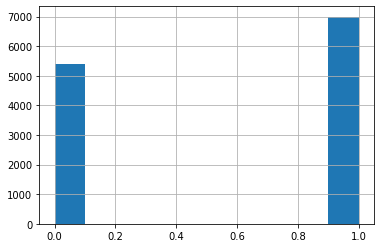

In [ ]:
train_y.hist()

In [ ]:
n = train_df.shape[1]
for i in range(n):
  print(train_df.columns[i]," - ",train_df.iloc[:,i].dtype, " - ", train_df.iloc[:,i].unique(), " - ",train_df.iloc[:,i].isnull().sum())
  print('--------------------------------------------------------')

offer expiration  -  object  -  ['2days' '10hours']  -  0
--------------------------------------------------------
income_range  -  object  -  ['₹100000 or More' '₹87500 - ₹99999' '₹37500 - ₹49999' 'Less than ₹12500'
 '₹50000 - ₹62499' '₹12500 - ₹24999' '₹75000 - ₹87499' '₹25000 - ₹37499'
 '₹62500 - ₹74999']  -  0
--------------------------------------------------------
no_visited_Cold drinks  -  object  -  ['4~8' 'less1' 'never' '1~3' 'gt8' nan]  -  198
--------------------------------------------------------
travelled_more_than_15mins_for_offer  -  int64  -  [1 0]  -  0
--------------------------------------------------------
Restaur_spend_less_than20  -  object  -  ['less1' '4~8' '1~3' 'gt8' 'never' nan]  -  121
--------------------------------------------------------
Marital Status  -  object  -  ['Married partner' 'Single' 'Divorced' 'Unmarried partner' 'Widowed']  -  0
--------------------------------------------------------
restaurant type  -  object  -  ['4 star restaurant' 'Ta

In [ ]:
round(100*train_nored.groupby(['Offer Accepted']).size()/train_nored.shape[0],0)

Offer Accepted
No     44.0
Yes    56.0
dtype: float64

In [ ]:
for i in train_nored.columns:
  #print(round(100*train_nored.groupby([i, 'Offer Accepted']).size()/train_nored.shape[0],0))
  print(round(100*train_nored.groupby([i, 'Offer Accepted']).size()/train_nored.groupby([i]).size(),0))
  print('----------------------------------------------')

offer expiration  Offer Accepted
10hours           No                47.0
                  Yes               53.0
2days             No                40.0
                  Yes               60.0
dtype: float64
----------------------------------------------
income_range      Offer Accepted
Less than ₹12500  No                42.0
                  Yes               58.0
₹100000 or More   No                42.0
                  Yes               58.0
₹12500 - ₹24999   No                43.0
                  Yes               57.0
₹25000 - ₹37499   No                43.0
                  Yes               57.0
₹37500 - ₹49999   No                43.0
                  Yes               57.0
₹50000 - ₹62499   No                42.0
                  Yes               58.0
₹62500 - ₹74999   No                47.0
                  Yes               53.0
₹75000 - ₹87499   No                49.0
                  Yes               51.0
₹87500 - ₹99999   No                46.0
           

#Common Libraries

####Generate File

In [ ]:
def gen_submission_file(model, test_X, name):
  label_pred = model.predict(test_X)
  f = open(f'submissions_{name}.csv', "w")
  f.write('id' + ',' + 'Offer Accepted\n')
  for i in range(len(label_pred)):
    if (label_pred[i] == 0):
      f.write(str(i) + ',' + 'No\n')
    else:
      f.write(str(i) + ',' + 'Yes\n')
  f.close()

In [ ]:
def metrics_display(model, X_train, X_test, y_train, y_test):
  from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
  y_pred = model.predict(X_test)
  #----------------------------------------------------------------------------------
  print(f'Accuracy on Training: {model.score(X_train, y_train)}')
  print()
  print(f'Accuracy on Test: {model.score(X_test, y_test)}')
  print()
  print('---------------------------------------------------------------')
  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  ConfusionMatrixDisplay(cm).plot()
  RocCurveDisplay.from_estimator(model, X_test, y_test, pos_label = 0)
  PrecisionRecallDisplay.from_estimator(model, y_test, y_pred)
  plt.show()

#Linear Models

##Perceptron

In [ ]:
## No Cross Validation
def run_perceptron(train_X, train_y, test_X):
  from sklearn.linear_model import Perceptron
  from sklearn.model_selection import train_test_split
  random_state = 43
  X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.20, random_state = random_state)
  model = Perceptron(random_state = random_state,)
  model.fit(X_train, y_train)
  metrics_display(model, X_train, X_test, y_train, y_test)
  gen_submission_file(model, test_X, 'percep')


In [ ]:
## With Cross Validation
def run_perceptron_cv(train_X, train_y):
  from sklearn.linear_model import Perceptron
  from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedShuffleSplit,train_test_split
  random_state = 43
  X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.20, random_state = random_state)
  sss = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = random_state)
  params = {'penalty':['l1','l2','elasticnet'], 'alpha': np.logspace(-4,0,5), 'l1_ratio':[0,0.15, 0.5], 'max_iter':[500,1000,1500], 'class_weight':[None, 'balanced']}
  gs = GridSearchCV(estimator=Perceptron(), param_grid = params, cv = sss)
  gs.fit(X_train, y_train)
  metrics_display(gs, X_train, X_test, y_train, y_test)
  print(gs.best_params_)


####Target Encoding Dataset

Accuracy on Training: 0.6146559428060768

Accuracy on Test: 0.6136526090064331

---------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.24      0.39      1425
         1.0       0.56      1.00      0.72      1373

    accuracy                           0.61      2798
   macro avg       0.78      0.62      0.55      2798
weighted avg       0.78      0.61      0.55      2798



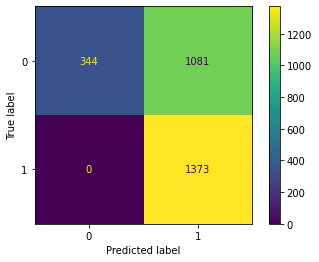

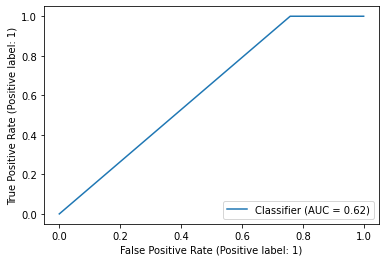

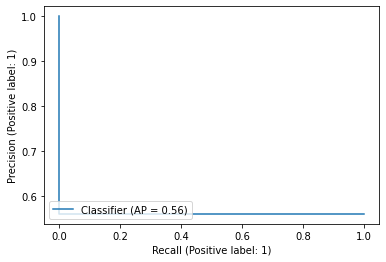

In [ ]:
run_perceptron(train_mean_X, train_mean_y, test_mean_X)

In [ ]:
run_perceptron_cv(train_mean_X, train_mean_y)

####One hot encoding

In [ ]:
run_perceptron(train_ohe_X, train_ohe_y)

In [ ]:
run_perceptron_cv(train_ohe_X, train_ohe_y)

####Ordinal + Mean Encoding

In [ ]:
run_perceptron(train_ome_X, train_ome_y)

In [ ]:
run_perceptron_cv(train_ome_X, train_ome_y)

##Logistic Regression

In [ ]:
## No Cross Validation
def run_logreg(train_X, train_y, test_X):
  from sklearn.linear_model import LogisticRegression
  from sklearn.model_selection import train_test_split
  random_state = 43
  X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.20, random_state = random_state)
  model = LogisticRegression(C=1.7782794100389228, class_weight= 'balanced', l1_ratio= 0, max_iter =200, penalty = 'l2', random_state = random_state)
  #{'C': 1.7782794100389228, 'class_weight': 'balanced', 'l1_ratio': 0, 'max_iter': 200, 'penalty': 'l2'}
  model.fit(X_train, y_train)
  metrics_display(model, X_train, X_test, y_train, y_test)
  gen_submission_file(model, test_X, 'logreg')



In [ ]:
## With Cross Validation
def run_logreg_cv(train_X, train_y):
  from sklearn.linear_model import LogisticRegression
  from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedShuffleSplit, train_test_split
  random_state = 43
  X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.20, random_state = random_state)
  sss = StratifiedShuffleSplit(n_splits = 5, test_size = 0.3, random_state = random_state)
  params = {'penalty':['l1','l2','elasticnet'], 'C': np.logspace(-2,1,5), 'l1_ratio':[0,0.15, 0.5], 'max_iter':[100, 200,500], 'class_weight':[None, 'balanced', {0: 0.6, 1: 0.4} ]}
  gs = GridSearchCV(estimator=LogisticRegression(), param_grid = params, cv = sss)
  gs.fit(X_train, y_train)
  metrics_display(gs, X_train, X_test, y_train, y_test)
  print(gs.best_params_)


####Target Encoding Dataset

Accuracy on Training: 0.6571939231456658

Accuracy on Test: 0.6465332380271622

---------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.71      0.52      0.60      1425
         1.0       0.61      0.77      0.68      1373

    accuracy                           0.65      2798
   macro avg       0.66      0.65      0.64      2798
weighted avg       0.66      0.65      0.64      2798



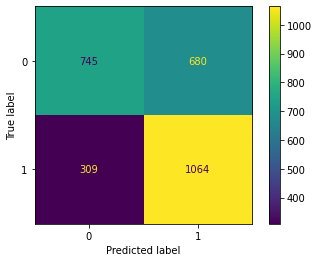

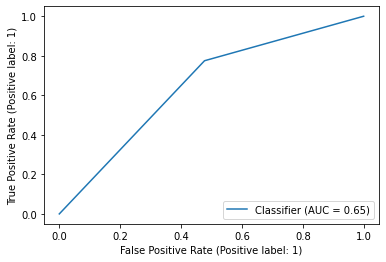

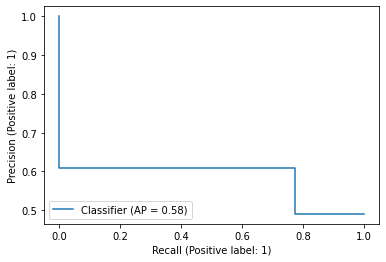

In [ ]:
run_logreg(train_mean_X, train_mean_y, test_mean_X)

Accuracy on Training: 0.6571939231456658

Accuracy on Test: 0.6465332380271622

---------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.71      0.52      0.60      1425
         1.0       0.61      0.77      0.68      1373

    accuracy                           0.65      2798
   macro avg       0.66      0.65      0.64      2798
weighted avg       0.66      0.65      0.64      2798



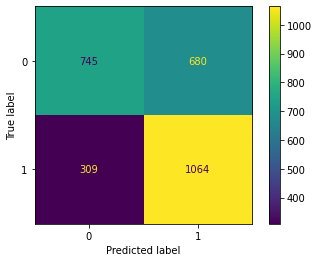

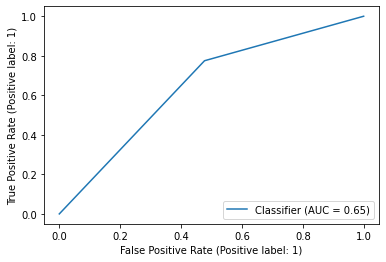

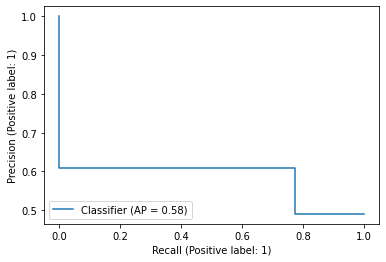

{'C': 1.7782794100389228, 'class_weight': 'balanced', 'l1_ratio': 0, 'max_iter': 200, 'penalty': 'l2'}


In [ ]:
run_logreg_cv(train_mean_X, train_mean_y)

####One hot encoding

Accuracy on Training: 0.5367060486721196

Accuracy on Test: 0.5484652665589661

---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.49      0.53      0.51      1093
           1       0.60      0.56      0.58      1383

    accuracy                           0.55      2476
   macro avg       0.55      0.55      0.55      2476
weighted avg       0.55      0.55      0.55      2476



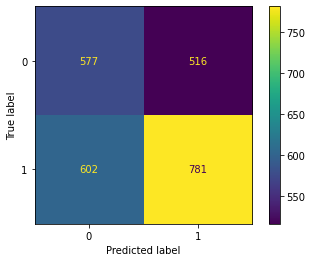

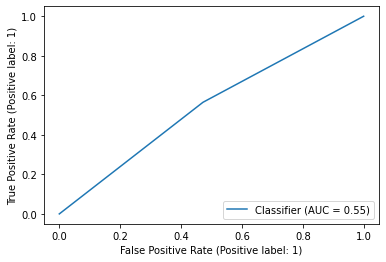

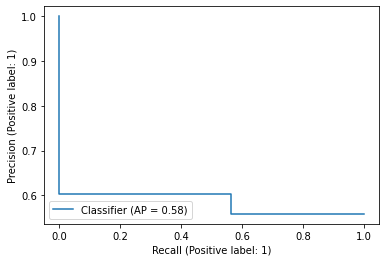

In [ ]:
run_logreg(train_ohe_X, train_ohe_y, test_ohe_X)

In [ ]:
run_logreg_cv(train_ohe_X, train_ohe_y)

####Ordinal + Mean Encoding

Accuracy on Training: 0.5177837354781054

Accuracy on Test: 0.5139385275196569

---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.55      0.54      1425
           1       0.51      0.48      0.49      1373

    accuracy                           0.51      2798
   macro avg       0.51      0.51      0.51      2798
weighted avg       0.51      0.51      0.51      2798



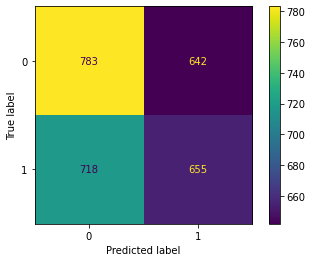

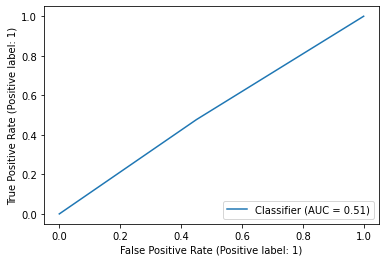

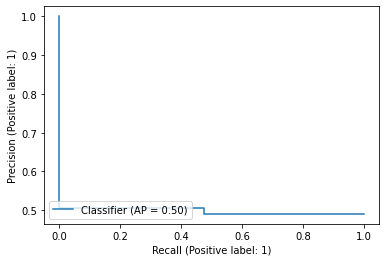

In [ ]:
run_logreg(train_ome_X, train_ome_y)

In [ ]:
run_logreg_cv(train_ome_X, train_ome_y)

##Support Vector Machines

In [ ]:
## No Cross Validation
def run_svc(train_X, train_y, test_X):
  from sklearn.svm import SVC
  from sklearn.model_selection import train_test_split
  random_state = 43
  X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.20, random_state = random_state)
  model = SVC(C=10, kernel = 'rbf', degree = 2, gamma = 'scale', max_iter = -1, random_state =43)
  #'kernel': 'rbf', 'gamma': 'scale', 'degree': 1, 'C': 0.1
  #{'C': 3.1622776601683795, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
  model.fit(X_train, y_train)
  metrics_display(model, X_train, X_test, y_train, y_test)
  gen_submission_file(model, test_X, 'svc')



In [ ]:
## With Cross Validation
def run_svc_cv(train_X, train_y):
  from sklearn.svm import SVC
  from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedShuffleSplit, train_test_split
  random_state = 43
  X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.20, random_state = random_state)
  sss = StratifiedShuffleSplit(n_splits = 5, test_size = 0.3, random_state = random_state)
  params = {'C':np.logspace(-1,2,5),'kernel':['rbf', 'linear', 'poly'], 'degree':[1,2,3], 'gamma':['scale', 'auto'] }
  gs = RandomizedSearchCV(estimator=SVC(), param_distributions = params, cv = sss)
  gs.fit(X_train, y_train)
  metrics_display(gs, X_train, X_test, y_train, y_test)
  print(gs.best_params_)


####Target Encoding Dataset

Accuracy on Training: 0.639301221851964

Accuracy on Test: 0.6017770597738288

---------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.58      0.36      0.45      1093
         1.0       0.61      0.79      0.69      1383

    accuracy                           0.60      2476
   macro avg       0.59      0.58      0.57      2476
weighted avg       0.60      0.60      0.58      2476



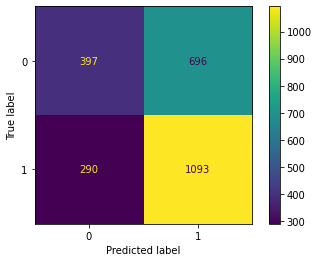

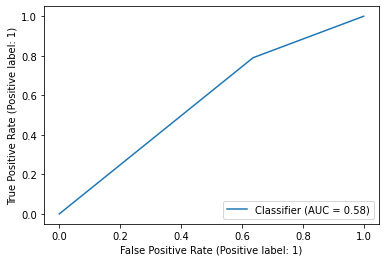

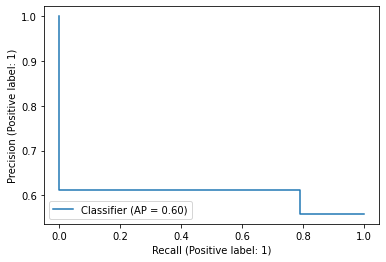

In [ ]:
run_svc(train_mean_X, train_mean_y, test_mean_X)

Accuracy on Training: 0.6336463697869332

Accuracy on Test: 0.6050080775444265

---------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.61      0.29      0.39      1093
         1.0       0.60      0.85      0.71      1383

    accuracy                           0.61      2476
   macro avg       0.61      0.57      0.55      2476
weighted avg       0.61      0.61      0.57      2476



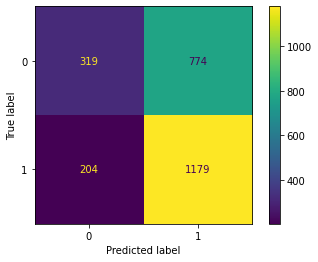

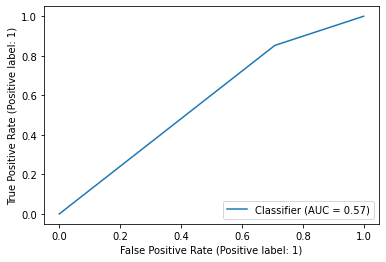

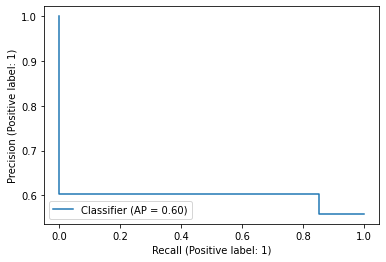

{'kernel': 'rbf', 'gamma': 'scale', 'degree': 1, 'C': 0.1}


In [ ]:
run_svc_cv(train_mean_X, train_mean_y)

####One hot encoding

In [ ]:
train_ohe_y.shape, train_ohe_X.shape

((12379,), (12379, 68))

Accuracy on Training: 0.5665959810158537

Accuracy on Test: 0.558562197092084

---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1093
           1       0.56      1.00      0.72      1383

    accuracy                           0.56      2476
   macro avg       0.28      0.50      0.36      2476
weighted avg       0.31      0.56      0.40      2476



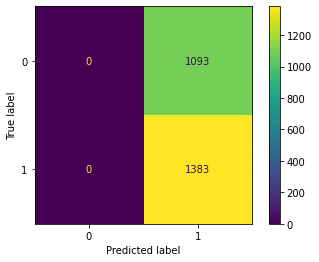

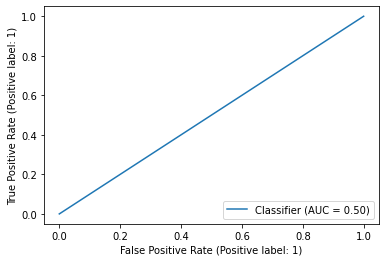

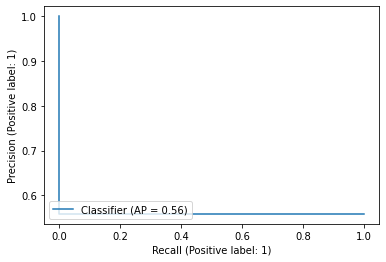

In [ ]:
run_svc(train_ohe_X, train_ohe_y, test_ohe_X)

In [ ]:
run_svc_cv(train_ohe_X, train_ohe_y)

####Ordinal + Mean Encoding

Accuracy on Training: 0.5665959810158537

Accuracy on Test: 0.558562197092084

---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1093
           1       0.56      1.00      0.72      1383

    accuracy                           0.56      2476
   macro avg       0.28      0.50      0.36      2476
weighted avg       0.31      0.56      0.40      2476



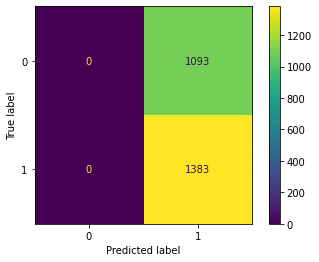

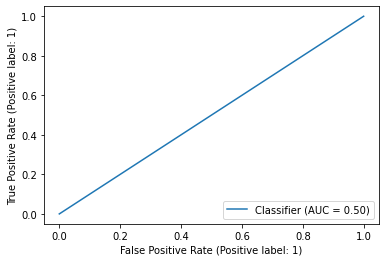

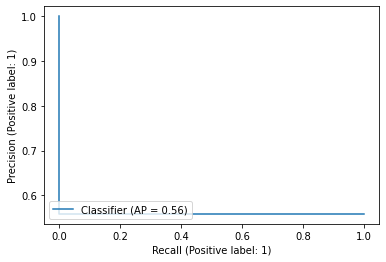

In [ ]:
run_svc(train_ome_X, train_ome_y, test_ome_X)

In [ ]:
run_svc_cv(train_ome_X, train_ome_y)

##RidgeClassifier

In [ ]:
## No Cross Validation
def run_ridge(train_X, train_y, test_X):
  from sklearn.linear_model import RidgeClassifier
  from sklearn.model_selection import train_test_split
  random_state = 43
  X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.20, random_state = random_state)
  model = RidgeClassifier(alpha = 0.1, max_iter = 500, )
  model.fit(X_train, y_train)
  metrics_display(model, X_train, X_test, y_train, y_test)
  gen_submission_file(model, test_X, 'ridge')



In [ ]:
## With Cross Validation
def run_ridge_cv(train_X, train_y):
  from sklearn.linear_model import RidgeClassifier
  from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedShuffleSplit, train_test_split
  random_state = 43
  X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.20, random_state = random_state)
  sss = StratifiedShuffleSplit(n_splits = 5, test_size = 0.3, random_state = random_state)
  params = {'alpha':[0, 0.0001, 0.001],'max_iter':[1, 10, 50]}
  gs = GridSearchCV(estimator=RidgeClassifier(random_state = 43), param_grid = params, cv = sss)
  gs.fit(X_train, y_train)
  metrics_display(gs, X_train, X_test, y_train, y_test)
  print(gs.best_params_)


####Target Encoding Dataset

Accuracy on Training: 0.6258124419684308

Accuracy on Test: 0.6258124419684308

---------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.58      0.93      0.71      1080
         1.0       0.81      0.32      0.46      1074

    accuracy                           0.63      2154
   macro avg       0.70      0.62      0.59      2154
weighted avg       0.70      0.63      0.59      2154



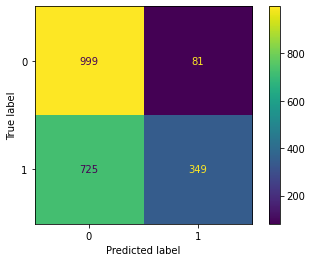

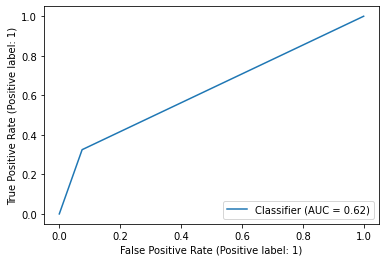

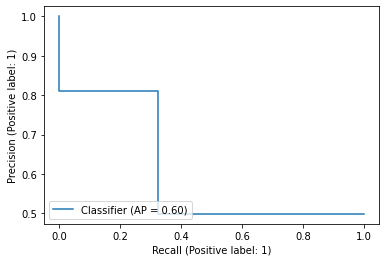

In [ ]:
run_ridge(train_mean_X, train_mean_y, test_mean_X)

Accuracy on Training: 0.6266248839368617

Accuracy on Test: 0.6299907149489322

---------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.58      0.91      0.71      1080
         1.0       0.80      0.34      0.48      1074

    accuracy                           0.63      2154
   macro avg       0.69      0.63      0.60      2154
weighted avg       0.69      0.63      0.60      2154



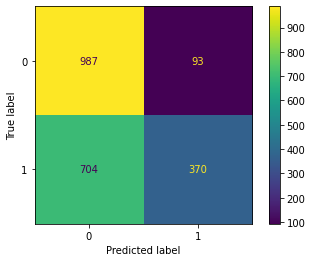

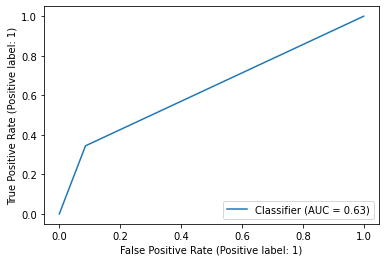

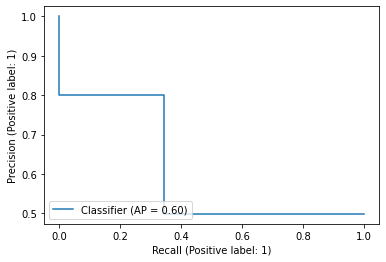

{'alpha': 0.0001, 'max_iter': 1}


In [ ]:
run_ridge_cv(train_mean_X, train_mean_y)

####One hot encoding

In [ ]:
train_ohe_y.shape, train_ohe_X.shape

((12379,), (12379, 68))

In [ ]:
run_ridge(train_ohe_X, train_ohe_y, test_ohe_X)

In [ ]:
run_svc_cv(train_ohe_X, train_ohe_y)

####Ordinal + Mean Encoding

Accuracy on Training: 0.6497765862377123

Accuracy on Test: 0.6476054324517513

---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.48      0.58      1425
           1       0.60      0.82      0.70      1373

    accuracy                           0.65      2798
   macro avg       0.67      0.65      0.64      2798
weighted avg       0.67      0.65      0.64      2798



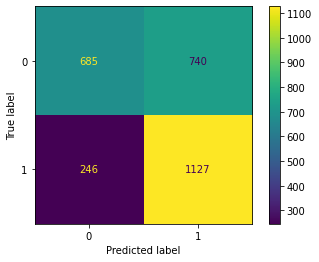

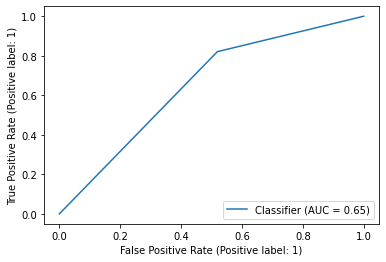

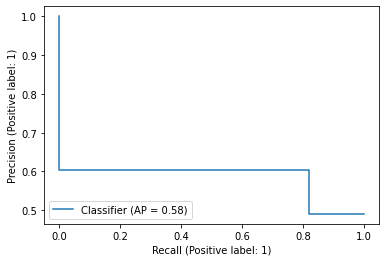

In [ ]:
run_ridge(train_ome_X, train_ome_y, test_ome_X)

Accuracy on Training: 0.649597855227882

Accuracy on Test: 0.6476054324517513

---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.48      0.58      1425
           1       0.60      0.82      0.70      1373

    accuracy                           0.65      2798
   macro avg       0.67      0.65      0.64      2798
weighted avg       0.67      0.65      0.64      2798



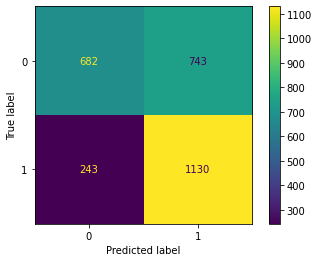

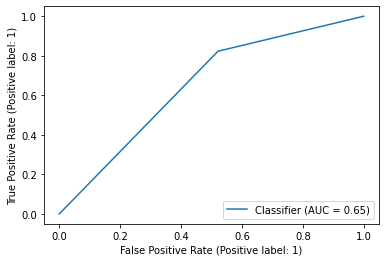

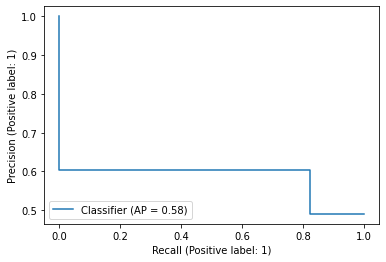

{'alpha': 0, 'max_iter': 1}


In [ ]:
run_ridge_cv(train_ome_X, train_ome_y)

##SGDClassifier

In [ ]:
## No Cross Validation
def run_sgd(train_X, train_y, test_X):
  from sklearn.linear_model import SGDClassifier
  from sklearn.model_selection import train_test_split
  random_state = 43
  X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.20, random_state = random_state)
  model = SGDClassifier(loss = "modified_huber", penalty = 'l2', alpha = 0.00001, l1_ratio = 0, max_iter = 1000, random_state = 43)
  model.fit(X_train, y_train)
  metrics_display(model, X_train, X_test, y_train, y_test)
  gen_submission_file(model, test_X, 'sgd')



In [ ]:
## With Cross Validation
def run_sgd_cv(train_X, train_y):
  from sklearn.linear_model import RidgeClassifier
  from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedShuffleSplit, train_test_split
  random_state = 43
  X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.20, random_state = random_state)
  sss = StratifiedShuffleSplit(n_splits = 5, test_size = 0.3, random_state = random_state)
  params = {'alpha':[0, 0.0001, 0.001],'max_iter':[1, 10, 50]}
  gs = GridSearchCV(estimator=RidgeClassifier(random_state = 43), param_grid = params, cv = sss)
  gs.fit(X_train, y_train)
  metrics_display(gs, X_train, X_test, y_train, y_test)
  print(gs.best_params_)


####Target Encoding Dataset

Accuracy on Training: 0.6231456657730117

Accuracy on Test: 0.6165117941386705

---------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.60      0.77      0.67      1425
         1.0       0.66      0.46      0.54      1373

    accuracy                           0.62      2798
   macro avg       0.63      0.61      0.61      2798
weighted avg       0.63      0.62      0.61      2798



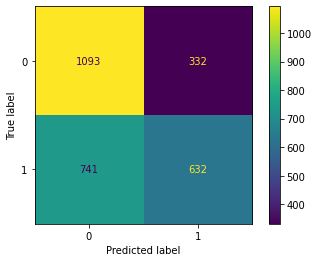

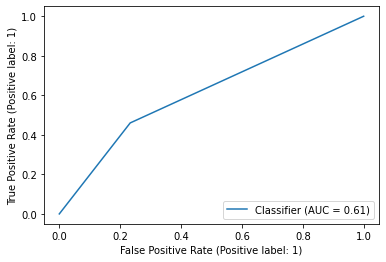

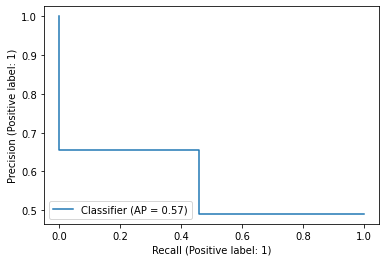

In [ ]:
run_sgd(train_mean_X, train_mean_y, test_mean_X)

In [ ]:
run_ridge_cv(train_mean_X, train_mean_y)

####One hot encoding

In [ ]:
train_ohe_y.shape, train_ohe_X.shape

((12379,), (12379, 68))

Accuracy on Training: 0.49767649687220733

Accuracy on Test: 0.5092923516797713

---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      1.00      0.67      1425
           1       0.00      0.00      0.00      1373

    accuracy                           0.51      2798
   macro avg       0.25      0.50      0.34      2798
weighted avg       0.26      0.51      0.34      2798



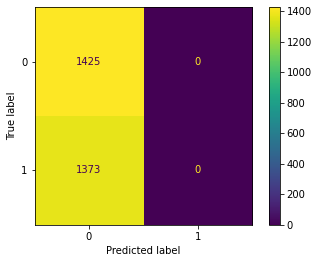

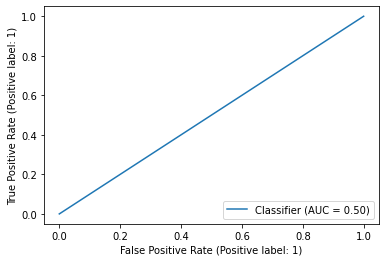

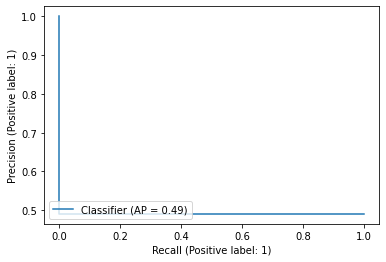

ValueError: ignored

In [ ]:
run_sgd(train_ohe_X, train_ohe_y, test_ohe_X)

In [ ]:
run_sgd_cv(train_ohe_X, train_ohe_y)

####Ordinal + Mean Encoding

In [ ]:
run_sgd(train_ome_X, train_ome_y, test_ome_X)

In [ ]:
run_sgd_cv(train_ome_X, train_ome_y)